# Project _ Election Data Analysis(Polls and Donors)

This project will take a look at data from the 2012 election.

Two datasets will be analyzed. The first one is the results of the politiccal polls. The second dataset is about the donors.

The following questions will be answered regarding the first dataset:

    1.) Who was being polled and what was their party affiliation?       
    2.) Did the poll results favor Romney or Obama?  
    3.) How do undecided voters effect the poll?    
    4.) How did voter sentiment change over time?  
    5.) Can we see an effect in the polls from the debates?


In [1]:
# imports for data analysis
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# imports for visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') 
%matplotlib inline

from __future__ import division

The data is obtained from HuffPost Pollster. I will use the requests module to import some data from the web. StringIO will be used to work with csv data gained from HuffPost. 

In [2]:
# use to grab data from web(HTTP cababilities)
import requests

# work with csv file, the DataFrame will require a .read() method
from StringIO import StringIO

In [3]:
# link for poll data in csv format
url = "http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv"

# use requests to get the information in text form
source = requests.get(url).text

# use StringIO to avoid an IO error with pandas
poll_data = StringIO(source)

In [4]:
# set poll data as DataFrame
poll_df = pd.read_csv(poll_data)

# quick look at the data info
poll_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
Pollster                  590 non-null object
Start Date                590 non-null object
End Date                  590 non-null object
Entry Date/Time (ET)      590 non-null object
Number of Observations    568 non-null float64
Population                590 non-null object
Mode                      590 non-null object
Obama                     590 non-null float64
Romney                    590 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              590 non-null object
Source URL                588 non-null object
Partisan                  590 non-null object
Affiliation               590 non-null object
Question Text             0 non-null float64
Question Iteration        590 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 78.4+ KB


### Q1. Who was being polled and what was their party affiliation?

In [5]:
# preview of DataFrame
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [6]:
# check the categories in 'Affiliation' column
poll_df.Affiliation.unique()

array(['None', 'Rep', 'Dem', 'Other'], dtype=object)

In [7]:
# drop the nonsense one which is 'Other' here
poll_df = poll_df[poll_df.Affiliation != 'Other']

In [8]:
# drop the nonsense column
poll_df.drop(['Question Text', 'Question Iteration','Other'],axis=1,inplace=True)

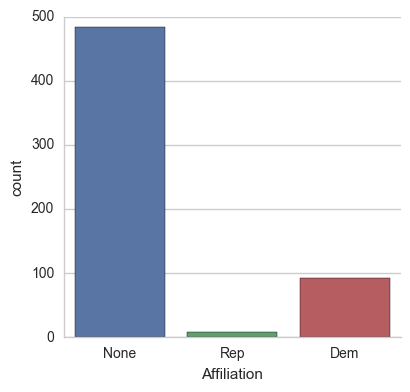

In [9]:
# factorplot the affiliation
sns.factorplot('Affiliation',kind='count', data=poll_df)

The plot shows that voters were leaning towards Democratic Affiliation, but the 'None Affiliation' occupied the most.

Let's see if sorting by the Population hue gives us any further insight.

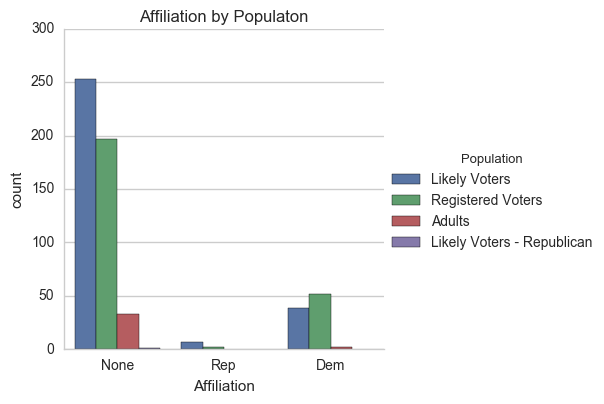

In [10]:
# factorplot the Affiliation by Populaton
sns.factorplot('Affiliation', kind='count', data=poll_df, hue='Population')

# title
plt.title('Affiliation by Populaton')

The plot shows that the 'Likely Voters' and the 'Registered Voters' are close to each other, which indicates that the poll data should hopefully be a good reflection on the populations polled. 

In [11]:
# again quick view of the data
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None


Next, let's take a look at the averages for Obama, Romney, and the polled people who remained undecided.

### Q2. Did the poll results favor Romney or Obama?

In [12]:
# first get the average
avg = pd.DataFrame(poll_df.mean())
avg

,0
Number of Observations,1293.913121
Obama,46.819113
Romney,44.650171
Undecided,6.357995


In [13]:
# drop the 'Number of Observation' row
avg.drop('Number of Observations', axis=0, inplace=True)

In [14]:
avg

,0
Obama,46.819113
Romney,44.650171
Undecided,6.357995


In [15]:
# let's get the error
std = pd.DataFrame(poll_df.std())
std.drop('Number of Observations', axis=0, inplace=True)

# view of error
std

,0
Obama,2.393305
Romney,2.779438
Undecided,3.168438


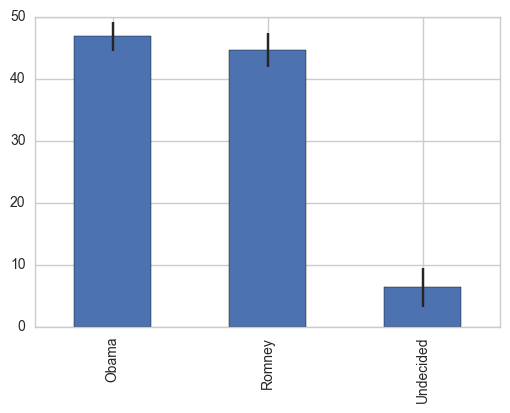

In [16]:
# plot using pandas built-in plot, with kind='bar' and yerr='std'
# yerr: error is parallel with y-axis 
avg.plot(yerr=std, kind='bar', legend=False)

We can learn that these polls were close and favored Obama slightly. Let's look at the numbers.

### Q3. How do undecided voters effect the poll?

In [17]:
# concatenate avg and std dataframe 
poll_avg = pd.concat([avg,std],axis=1)

# rename columns
poll_avg.columns = ['Average', 'STD']

# show
poll_avg

,Average,STD
Obama,46.819113,2.393305
Romney,44.650171,2.779438
Undecided,6.357995,3.168438


The numbers indicates a fairly close race. For the undecided part, most of them would be likely to vote for one of the candidates once the election occurred. If we assume that the undecided evenly between the two candidates are split, the observed difference should be an unbiased estimate of the final difference.

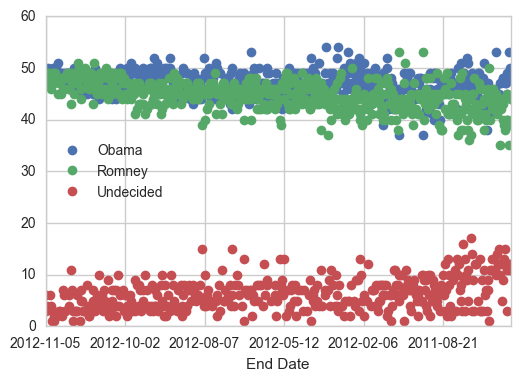

In [18]:
# a quick and messy time series analysis of the voter sentiment by plotting Obama/Romney favor versus the Poll End Dates. 
poll_df.plot(x='End Date', y=['Obama','Romney','Undecided'], linestyle='',marker='o')

This is just a quick idea and I will create a new DataFrame to make a better visualization of the above deal.

I will plot the difference between Obama and Romney and how it changed as time moves along. 

In [19]:
# for time stamps
from datetime import datetime

In [20]:
# define a new column for the difference between the two candidates   
poll_df['Difference'] = (poll_df.Obama - poll_df.Romney)/100

# preview
poll_df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Pollster URL,Source URL,Partisan,Affiliation,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,-0.01


A positive difference indicates a leaning towards Obama in the polls.

I will use groupby to group the polls by their Start Date and then sorting it by that Start Date.

### Q4. How did voter sentiment change over time?

In [21]:
poll_df = poll_df.groupby(['Start Date'], as_index=False).mean()

poll_df.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,0.09


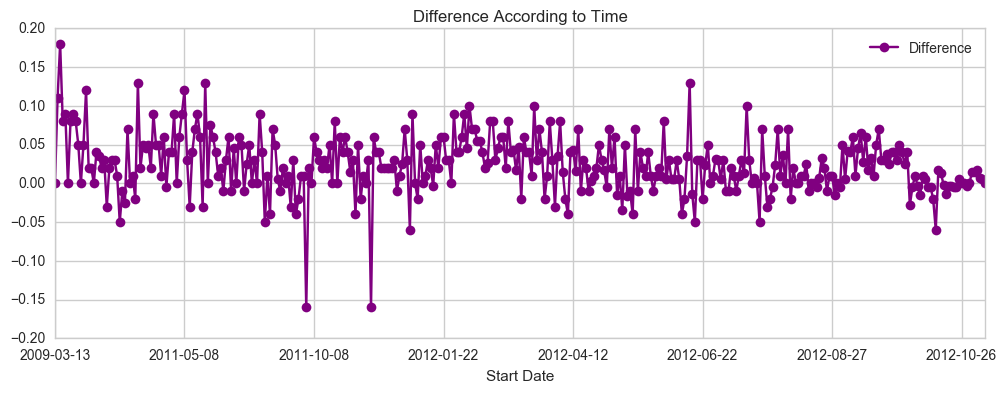

In [22]:
# sort by Start Date
poll_df1 = poll_df.sort_values(['Start Date'])

# plot the difference in polls between Obama and Romney
poll_df1.plot('Start Date','Difference',figsize=(12,4), marker='o', linestyle='-', 
             color='purple')

# title
plt.title('Difference According to Time')

It would be better to plot marker lines on the dates of the debates and see if there is any general insight to the poll results.

The debate dates were Oct 3rd, Oct 11, and Oct 22nd. Let's plot some lines as markers and then zoom in on the month of October.

In order to find where to set the x limits for the figure we need to find out where the index for the month of October in 2012 is. 

The code below is a simple for loop to find that row. Note, the string format of the date makes this difficult to do without using a lambda expression or a map.

### Q5. Can we see an effect in the polls from the debates?

In [23]:
# set row count and xlimit list
row_in = 0
xlimit=[]

# cycle through dates until 2012-10 is found, then print row index
for date in poll_df['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1

print min(xlimit)
print max(xlimit)

328
355


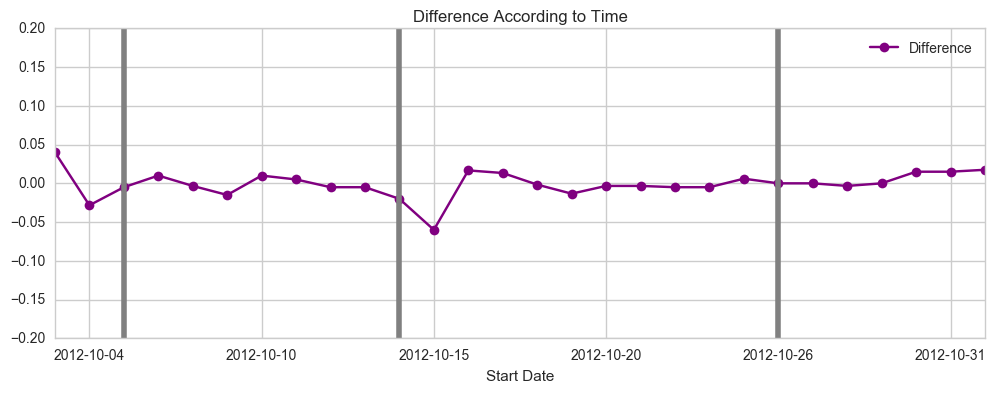

In [24]:
# start with original figure
poll_df.plot('Start Date','Difference',figsize=(12,4), marker='o', linestyle='-', 
             color='purple', xlim=(329,356))

# now add the debate date marker
# Oct 3rd
plt.axvline(x=329+2, linewidth=4, color='grey')
# Oct 11th
plt.axvline(x=329+10, linewidth=4, color='grey')
# Oct 22nd
plt.axvline(x=329+21, linewidth=4, color='grey')

# title
plt.title('Difference According to Time')

Surprisingly, thse polls reflect a dip for Obama after the second debate against Romney, even though he performed much worse against Romney during the first debate.

For all these polls it is important to remeber how geographical location can effect the value of a poll in predicting the outcomes of a national election.

# Donor Data Set

In this part I will switch gears and take a look at a data set consisting of information on donations to the federal campaign.

The questions will be answered while looking at this dataset are:

    1.) How much was donated and what was the average donation?
    2.) How did the donations differ between candidates?
    3.) How did the donations differ between Democrats and Republicans?
    4.) What were the demographics of the donors?
    5.) Is there a pattern to donation amounts?

In [26]:
# set the DataFrame as the csv file
donor_df = pd.read_csv('Election_Donor_Data.csv')

In [27]:
# a quick overview
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [28]:
# dataset info
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


It will be interesting to take a quick glimpse of the donation amounts and the average donation amounts.

In [29]:
# a quick look at the various donation amounts
donor_df['contb_receipt_amt'].value_counts()

 100.00     178188
 50.00      137584
 25.00      110345
 250.00      91182
 500.00      57984
 2500.00     49005
 35.00       37237
 1000.00     36494
 10.00       33986
 200.00      27813
 20.00       17565
 15.00       16163
 150.00      14600
 75.00       13647
 201.20      11718
 30.00       11381
 300.00      11204
 20.12        9897
 5.00         9024
 40.00        5007
 2000.00      4128
 55.00        3760
 1500.00      3705
 3.00         3383
 60.00        3084
 400.00       3066
-2500.00      2727
 110.00       2554
 125.00       2520
 19.00        2474
             ...  
 174.80          1
 7.27            1
 1219.00         1
 1884.88         1
 162.25          1
 218.31          1
 78.62           1
 203.16          1
 53.11           1
 499.66          1
 19.53           1
 188.60          1
 47.10           1
 19.85           1
 28.83           1
 202.59          1
-5500.00         1
 9.25            1
 202.66          1
 1205.00         1
 80.73           1
 115.07     

### Q1. How much was donated and what was the average donation?

In [30]:
# total donation
don_total = donor_df['contb_receipt_amt'].sum()

# mean donation
don_mean = donor_df['contb_receipt_amt'].mean()

# std of donation 
don_std =  donor_df['contb_receipt_amt'].std()

print 'The total donation was %.2f dollars.' % don_total
print 'The average donation was %.2f with a std %.2f dollars.' %(don_mean,don_std)

The total donation was 298751395.14 dollars.
The average donation was 298.24 with a std 3749.67 dollars.


The donation amounts had a huge variation. Let's see if there are any large donations or other factors messing with the distribution of the donations.

In [31]:
# make a Series from the DataFrame, use .copy() to avoid view errors
top_donor = donor_df['contb_receipt_amt'].copy()

# sort the values
top_donor.sort_values(inplace=True)

# check the Series
top_donor

114604     -30800.00
226986     -25800.00
101356      -7500.00
398429      -5500.00
250737      -5455.00
33821       -5414.31
908565      -5115.00
456649      -5000.00
574657      -5000.00
30513       -5000.00
562267      -5000.00
30584       -5000.00
86268       -5000.00
708920      -5000.00
665887      -5000.00
708899      -5000.00
708929      -5000.00
21172       -5000.00
21168       -5000.00
21167       -5000.00
262328      -5000.00
946875      -5000.00
7361        -5000.00
416403      -5000.00
21164       -5000.00
707945      -5000.00
615101      -5000.00
7973        -5000.00
54430       -5000.00
54434       -5000.00
             ...    
708022      10000.00
708898      10000.00
710177      10000.00
876244      10000.00
709608      10000.00
708919      10000.00
709739      10000.00
91145       10000.00
708138      10000.00
993178      10000.00
709813      10000.00
710730      10000.00
708928      10000.00
709268      10000.00
99829       10000.00
90076       10000.00
709859      1

We see that there were negative values as well as some huge donation amounts. The negative values were due to the FEC recording refunds as well as donations. Next we only look at the positive contribution amounts.

In [32]:
# get rid of refund amount
top_donor = top_donor[top_donor > 0]

# sort
top_donor.sort_values(inplace=True)

# top 10 most common donations value counts
top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

The range of top 10 amount was from 10 to 2500 dollars.

We will see how the donation amounts were distributed.

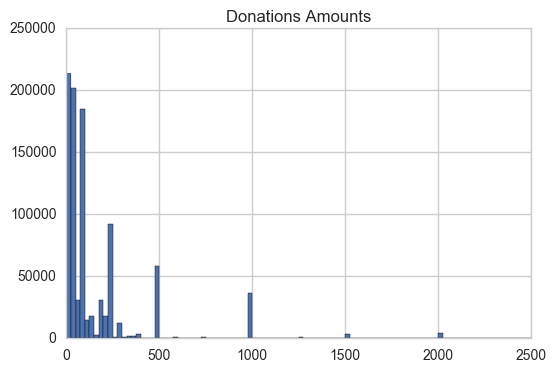

In [33]:
# create a Series of the common donations limited to 2500
com_don = top_donor[top_donor < 2500]

# set a high number of bins to account for the non-round donations and check histogram for spikes
com_don.hist(bins=100)
plt.title('Donations Amounts')

Then I will seperate Obama from the Republican Candidates by adding a Party Affiliation column. It can be done by using map along a dictionary of party affiliations. 

In [34]:
# grab the unique object from 'Candidate' column
candidates = donor_df.cand_nm.unique()

# show the candidates
candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [35]:
# dictionary of party affiliation)
party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

# map the party with candidate
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [36]:
# clear refunds
donor_df = donor_df[donor_df.contb_receipt_amt > 0]

# preview of DataFrame
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


### Q2. How did the donations differ between candidates?

Let's aggregate the data by candidates. We'll take a quick look at the total amounts received by each candidate. First we will look at the total number of donations and then at the total amount.

In [37]:
# groupby candidate and then display the total number of people who donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

Apparently Obama is the front-runner in number of people donating, which makes sense, since he is not competeing with any other democratic nominees. 

Let's take a look at the total dollar amounts.

In [38]:
# groupby candidate and then displayt the total amount donated
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

This is not super readable and I will further print out these values in a clean for loop.

In [39]:
# set the groupby as an object
cand_amt = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

# index tracker
i = 0

for don in cand_amt:
    print 'The candidate %s raises %.0f dollars' %(cand_amt.index[i], don)
    print '\n'
    i += 1

The candidate Bachmann, Michelle raises 2711439 dollars


The candidate Cain, Herman raises 7101082 dollars


The candidate Gingrich, Newt raises 12832770 dollars


The candidate Huntsman, Jon raises 3330373 dollars


The candidate Johnson, Gary Earl raises 566962 dollars


The candidate McCotter, Thaddeus G raises 39030 dollars


The candidate Obama, Barack raises 135877427 dollars


The candidate Paul, Ron raises 21009620 dollars


The candidate Pawlenty, Timothy raises 6004819 dollars


The candidate Perry, Rick raises 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raises 373010 dollars


The candidate Romney, Mitt raises 88335908 dollars


The candidate Santorum, Rick raises 11043159 dollars




It is better now but still hard to do a quick comparison just by reading it. A quick graph presentation may be clear.

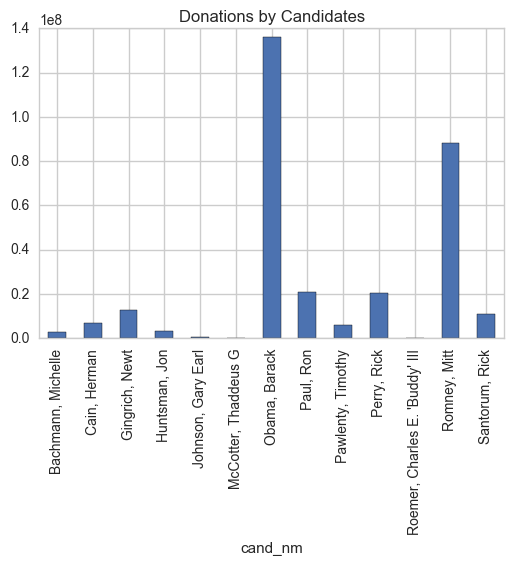

In [40]:
# plot of total donation amounts
cand_amt.plot(kind='bar')
plt.title('Donations by Candidates')

Now the comparison is readable. As we can see before, Obama is the front-runner in donation amounts.

Let's compare Democrats versus Republican donations.

### Q3. How did the donations differ between Democrats and Republicans?

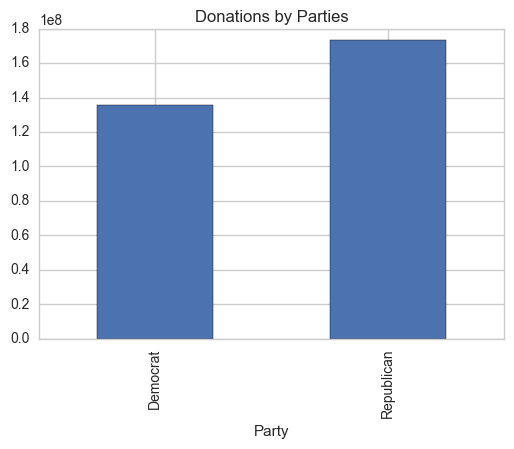

In [41]:
# groupby party and then count donations 
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')
plt.title('Donations by Parties')

It seems like Obama couldn't compete against all the republicans, but he certainly has the advantage of their funding being splintered across multiple candidates.

We will further look at donations and who they are. 

We will start by grabing the occupation information from the donor_df DataFrame. Then we will use pivot_table to make the index defined by the various occupations and then have the columns defined by the Party (Republican or Democrat).

Finally we'll also pass an aggregation function in the pivot table, in this case a simple sum function will add up all the contributions by anyone with the same profession. 

### Q4. What were the demographics of the donors?

In [42]:
# use a pivot table to extract and organize the data by the donor occupation
occupation_df = donor_df.pivot_table('contb_receipt_amt',
                               index='contbr_occupation',
                               columns='Party',
                               aggfunc='sum')

# check out the DataFrame 
occupation_df.head(8)

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
'MIS MANAGER,NaN,177.6
(PART-TIME) SALES CONSULTANT & WRITER,NaN,285.0
(RETIRED),NaN,250.0


In [43]:
# shape of DataFrame
occupation_df.shape

(45067, 2)

It is probably far too large to display effectively with a small, static visualization. We need to have a cut-off for total contribution amounts. 
Afterall, small donations of 20 dollars by one type of occupation won't give us too much insight. So let's set our cut off at 1 million dollars.

In [44]:
# set a cut off point at 1 milllion dollars of sum contributions
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

# check out the shape
occupation_df.shape

(31, 2)

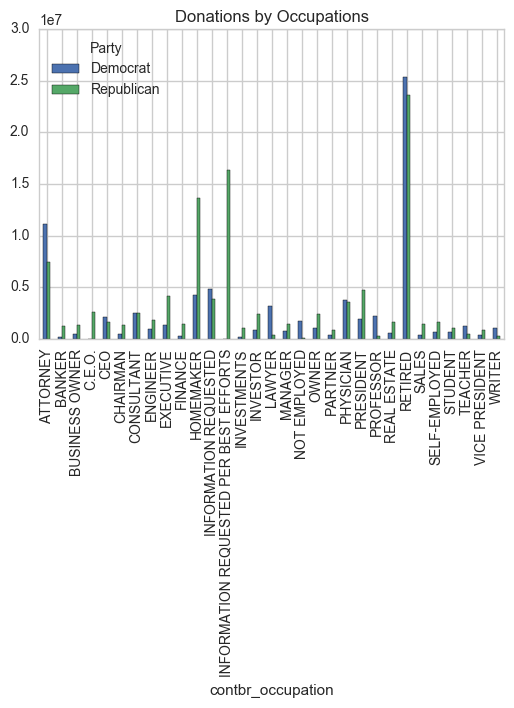

In [45]:
# plot 
occupation_df.plot(kind='bar')

# title
plt.title('Donations by Occupations')

It is a bit hard to read and let's set the occupation horizontally.

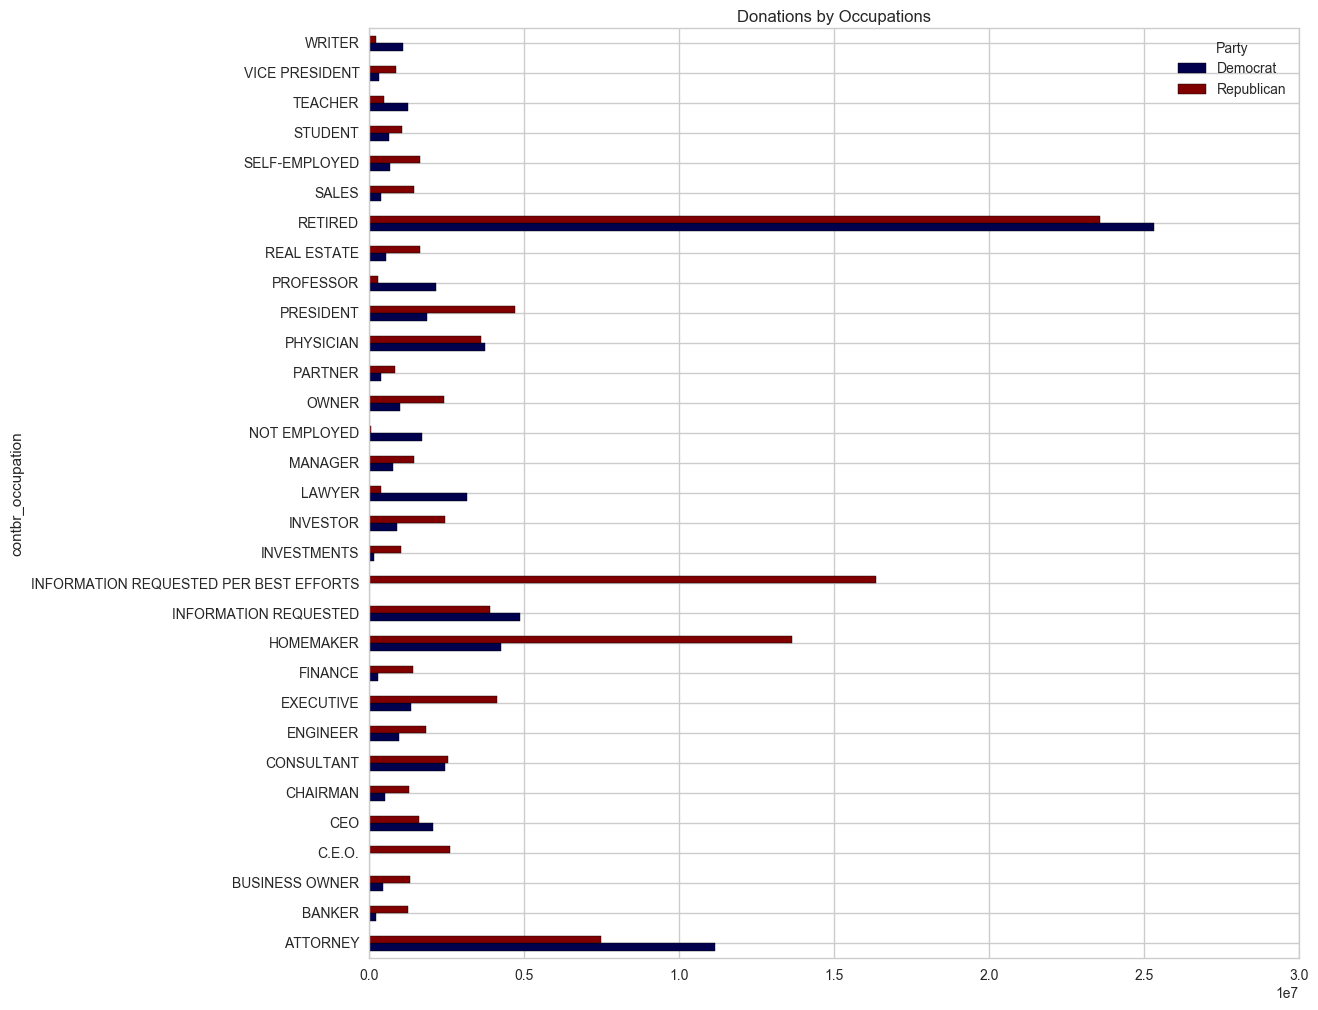

In [46]:
# horizontal bar plot
occupation_df.plot(kind='barh', figsize=(12,12),cmap='seismic')

# title
plt.title('Donations by Occupations')

We can see some occupations that were either mislabeled or were not really occupations. Let's get rid of 'Information Requested' occupation and combine 'CEO' and 'C.E.O'.

In [47]:
# drop unavailable occupations
occupation_df.drop(['INFORMATION REQUESTED PER BEST EFFORTS',
                   'INFORMATION REQUESTED'],axis=0,inplace=True)


In [48]:
# combine the 'CEO' and 'C.E.O' rows
occupation_df.loc['CEO'] = occupation_df.loc['CEO'] + occupation_df.loc['C.E.O.']

# drop 'C.E.O'
occupation_df.drop('C.E.O.', inplace=True)

### Q5. Is there a pattern to donation amounts?

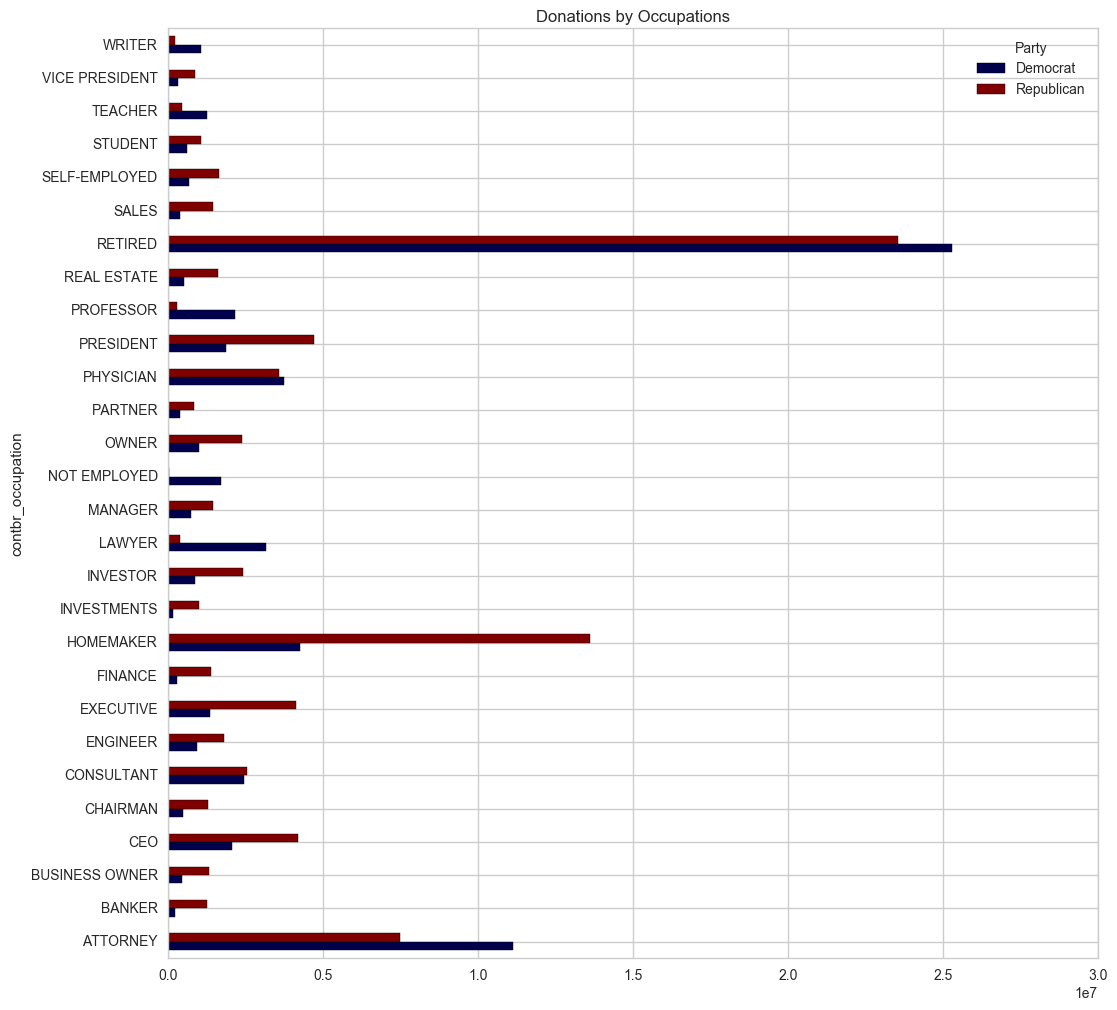

In [49]:
# plot again
occupation_df.plot(kind='barh',figsize=(12,12), cmap='seismic')

# title
plt.title('Donations by Occupations')

From the horizontal graph, we can clearly see that the donations from 'RETIRED', 'HOMEMAKER' and 'ATTONRNEY' were the top three. Besides, CEOs were a little more conservative leaning. This may be due to the tax philosphies of each party during the election. We can further obtain some data regarding the population of these occupations to see if they were the majority of the population. 